In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import *
from sklearn.metrics import f1_score, precision_score

# First step to preparing data

In [102]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
orginal = pd.read_csv(r'C:\Users\Darab Store\Desktop\ML-projects\Git-Hub\PlayGround-Competition\Steel Plate Defect Prediction\faults.csv')

In [123]:
df = pd.concat([train, orginal], ignore_index=True)
df.drop('id', axis=1, inplace=True)

In [124]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [125]:
X = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]

y = df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']]

In [127]:
X = X.astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21160 entries, 0 to 21159
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              21160 non-null  float64
 1   X_Maximum              21160 non-null  float64
 2   Y_Minimum              21160 non-null  float64
 3   Y_Maximum              21160 non-null  float64
 4   Pixels_Areas           21160 non-null  float64
 5   X_Perimeter            21160 non-null  float64
 6   Y_Perimeter            21160 non-null  float64
 7   Sum_of_Luminosity      21160 non-null  float64
 8   Minimum_of_Luminosity  21160 non-null  float64
 9   Maximum_of_Luminosity  21160 non-null  float64
 10  Length_of_Conveyer     21160 non-null  float64
 11  TypeOfSteel_A300       21160 non-null  float64
 12  TypeOfSteel_A400       21160 non-null  float64
 13  Steel_Plate_Thickness  21160 non-null  float64
 14  Edges_Index            21160 non-null  float64
 15  Em

<Figure size 500x250 with 0 Axes>

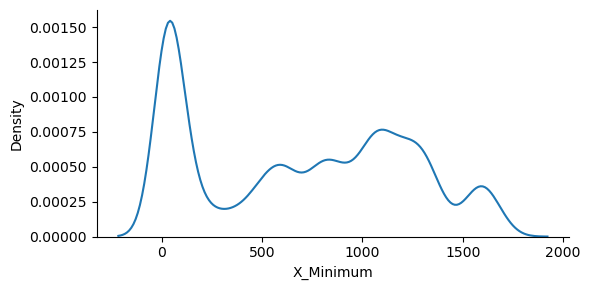

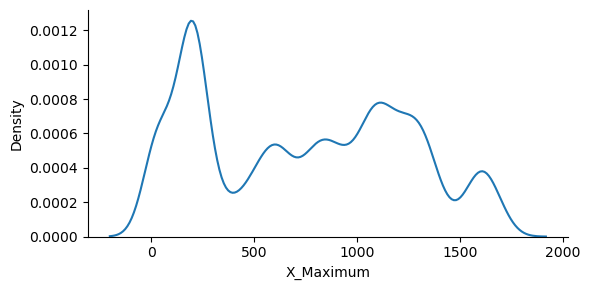

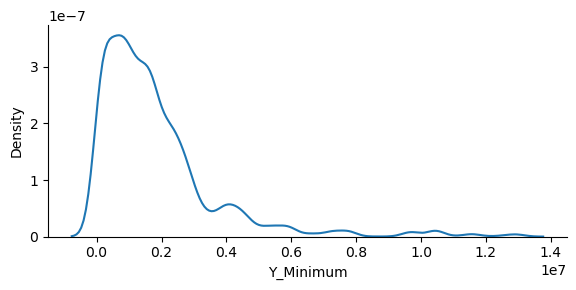

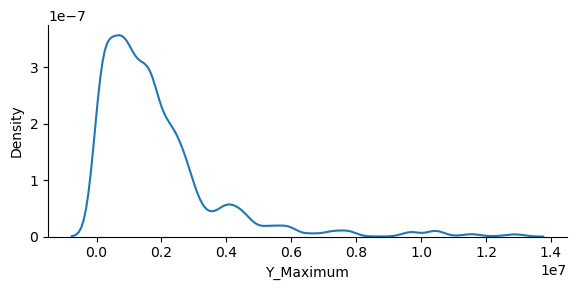

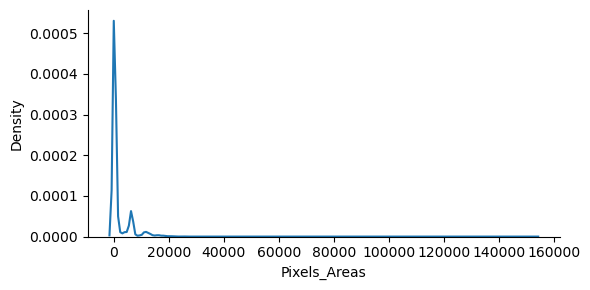

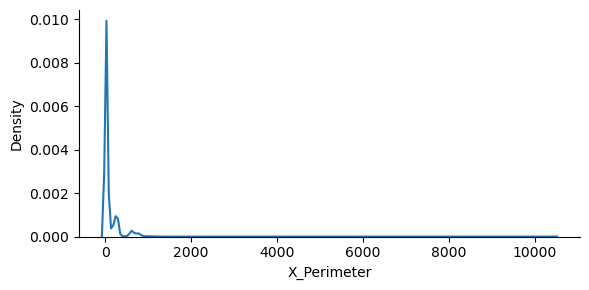

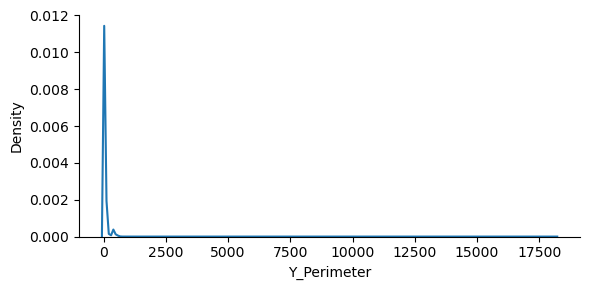

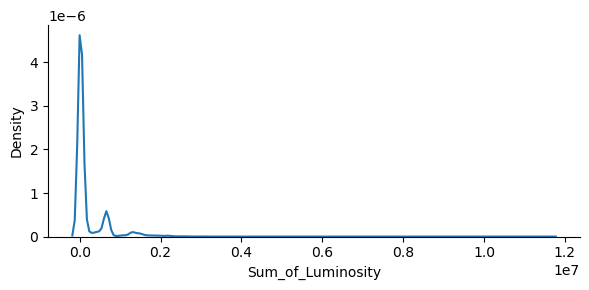

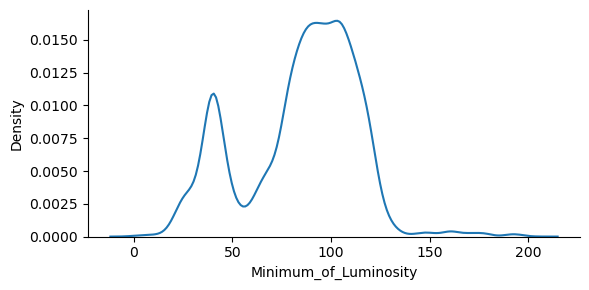

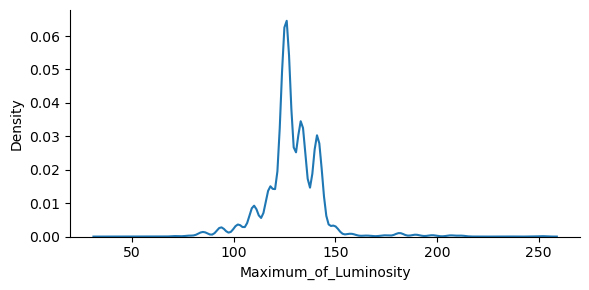

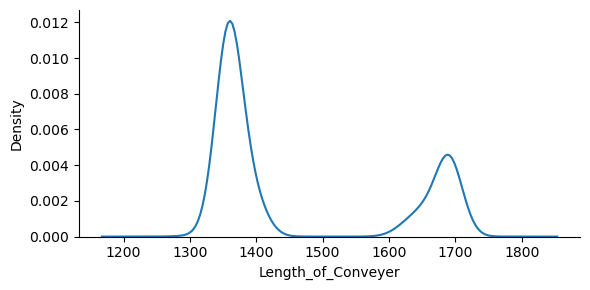

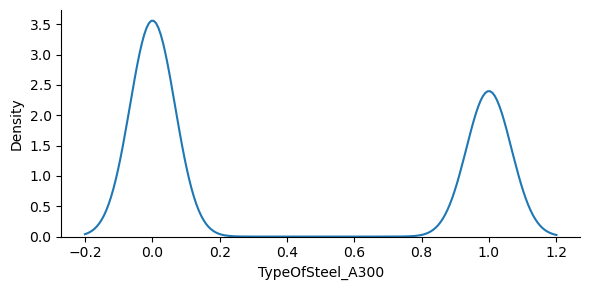

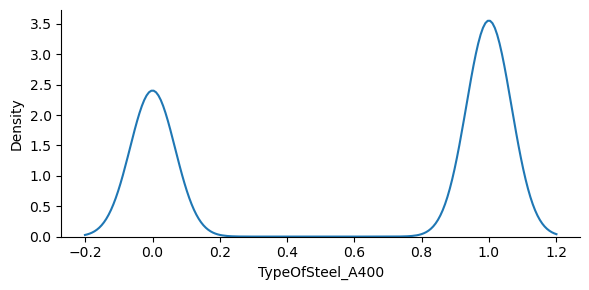

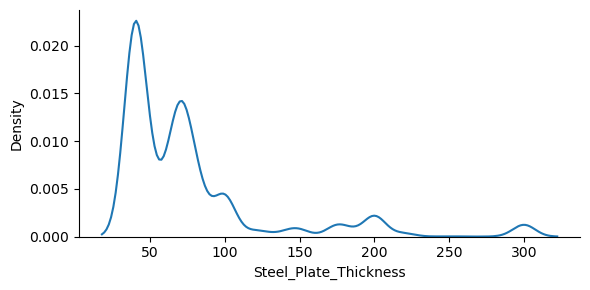

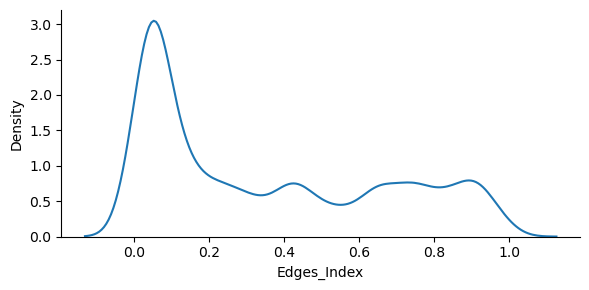

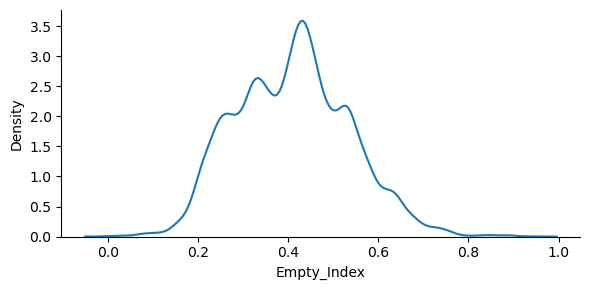

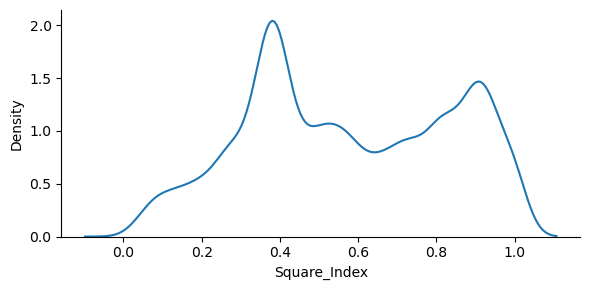

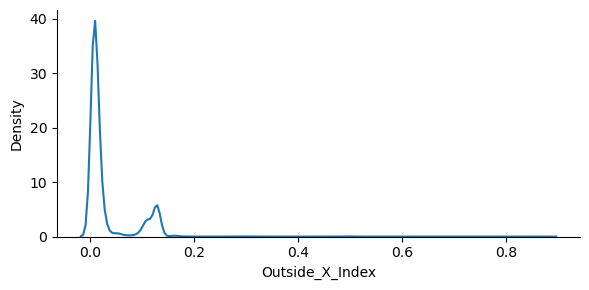

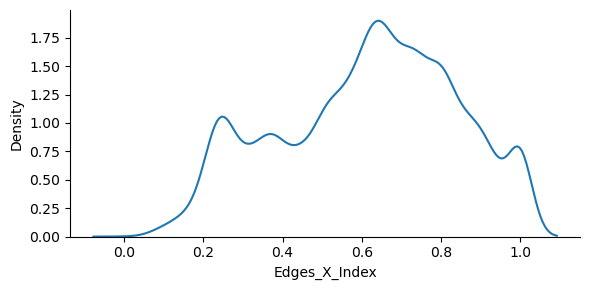

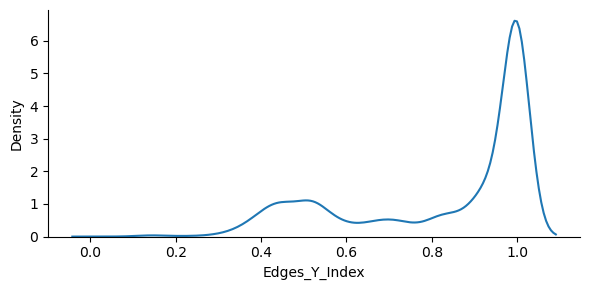

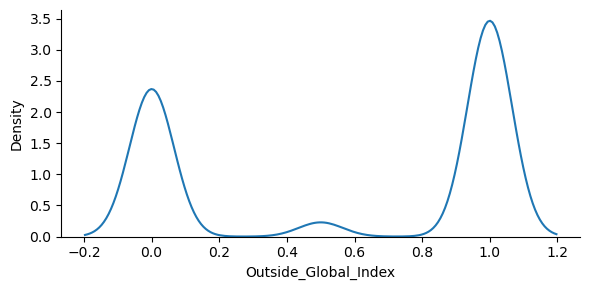

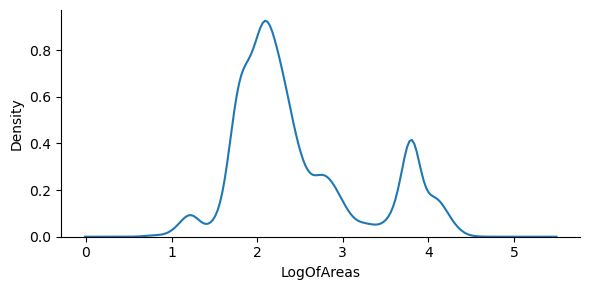

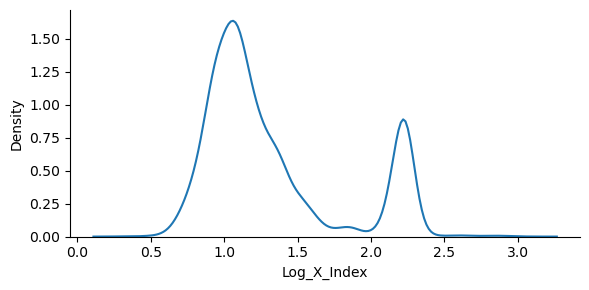

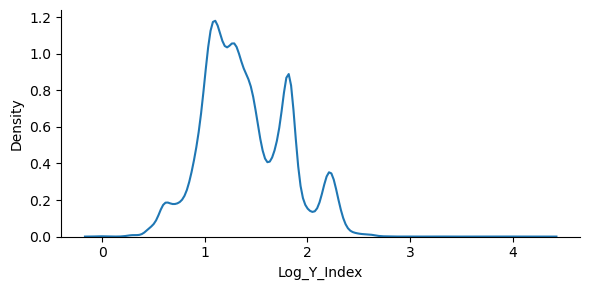

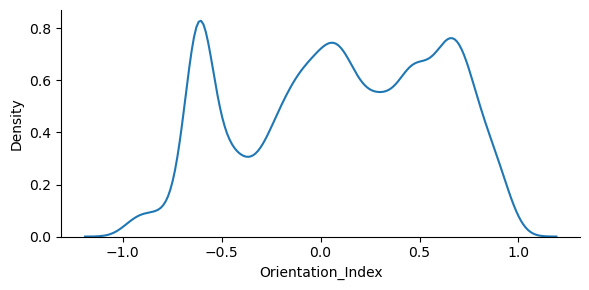

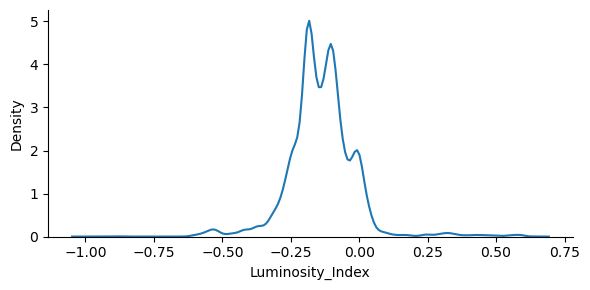

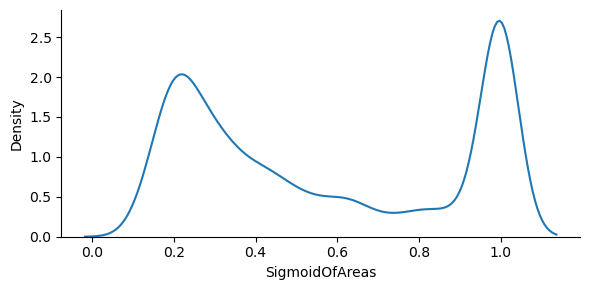

In [128]:
plt.figure(figsize=(5, 2.5))
for col in X.select_dtypes('float64'):
    sns.displot(data=df, x=col, height=3, aspect=2, kind='kde')

In [65]:
target = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains','Dirtiness', 'Bumps', 'Other_Faults']

X = df.drop(target, axis=1)
X = np.float64(X)

y = np.argmax(df[target], axis=1)
y = np.float64(y)

In [14]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, stratify=y, random_state=2)
x_train.shape, y_valid.shape

((17986, 27), (3174, 1))

# Make pipeline